In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
iris_df = load_iris()
tree_clf = DecisionTreeClassifier()
vt_clf = VotingClassifier(estimators=[("rf", tree_clf)], voting='hard')

In [4]:
X = iris_df['data']
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
vt_clf.fit(X_train, y_train)
y_pred = vt_clf.predict(X_test)
# accuracy_score(y_test, y_pred)

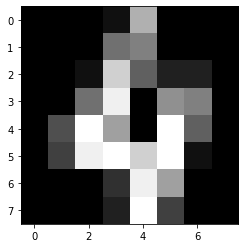

In [19]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

numbers = load_digits()
X = numbers['data']
y = numbers['target']

plt.imshow(X[4].reshape(8,8), cmap='gray')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

# CREAMOS EL VOTING CLASSIFIER Y LA PIPELINE PARA EL TRATAMIENTO DE LOS DATOS

rdf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
svc_clf = SVC(max_iter=9000)

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('rf', rdf_clf), ('svc', svc_clf)],
    voting='hard')

scaler = StandardScaler()

pipe = Pipeline([('slr', scaler),
                ('vote', voting_clf)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('slr', StandardScaler()),
                ('vote',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('svc', SVC(max_iter=9000))]))])

In [73]:
#PREPARAR LA DATA PARA TRABAJAR CON ELLA EN EL PLOTEO 

y_pred_pipe = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred_pipe))

X_reshaped = [X_test[i].reshape(8,8) for i in range(X_test.shape[0])]

0.9833333333333333


In [92]:
# CREADA UNA FUNCIÓN QUE PLOTEA LOS 9 DIGITOS DESPUES DE EL INDICE INDICADO CON SU RESPECTIVA ETIQUETA PREDECIDA POR EL VOTING
# CLASSIFIER
def plot_nine_digits(idx):
    fig, axs = plt.subplots(3,3)
    digits = 0
    for i in range(0,3):
        for j in range(0,3):
            axs[i,j].imshow(X_reshaped[digits + idx], cmap='binary')
            axs[i,j].set_title(y_pred_pipe[digits + idx])
            digits += 1

    for ax in axs.flat:
        ax.label_outer()

    fig.tight_layout()

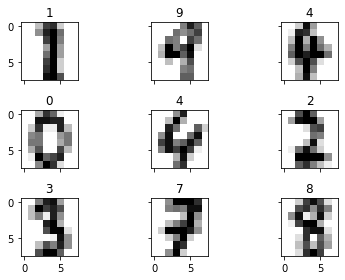

In [99]:
plot_nine_digits(10)